<a href="https://colab.research.google.com/github/Rhytham28/Rhytham_Repo/blob/main/Cats_vs_Dogs_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

# **Extract data from Kaggle**

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [1]:
# Dataset is in zip file format and we have extracted it using APIs
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:05<00:00, 194MB/s]
100% 1.06G/1.06G [00:05<00:00, 205MB/s]


In [3]:
# To unzip the data we use this syntax
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# **Import necessary libraries**

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization, Dropout

# **Create Generators - It divides data into small batches**

In [79]:
# Generators are used to create a CNN model
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int', # 1- Dog, 0- Cat
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize - We use this operation to get better pixel ranges from 0 to 1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# **Create a CNN model**

In [15]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [16]:
# To see the description of the model(whether it has been created properly or not)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
# Compile and execute the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
# Run the model
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 103ms/step - loss: 1.3940 - accuracy: 0.6030 - val_loss: 0.6099 - val_accuracy: 0.6940
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5665 - accuracy: 0.7051 - val_loss: 0.5828 - val_accuracy: 0.6952
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5007 - accuracy: 0.7620 - val_loss: 0.4898 - val_accuracy: 0.7662
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4363 - accuracy: 0.7997 - val_loss: 0.5004 - val_accuracy: 0.7664
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3770 - accuracy: 0.8292 - val_loss: 0.4976 - val_accuracy: 0.7718
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3049 - accuracy: 0.8668 - val_loss: 0.4543 - val_accuracy: 0.7844
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2492 - accuracy: 0.8969 - val_loss: 0.4798 - val_ac

# **Plot graphs to see the result after training of the model**

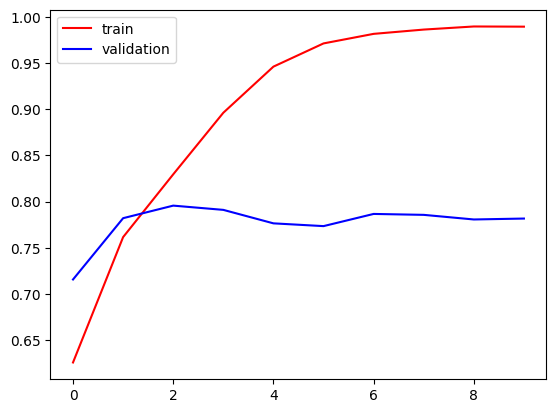

In [13]:
# Plot a graph between accuracy and validation accuracy(Graph looks like this before adding batchnorm and dropout layers)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

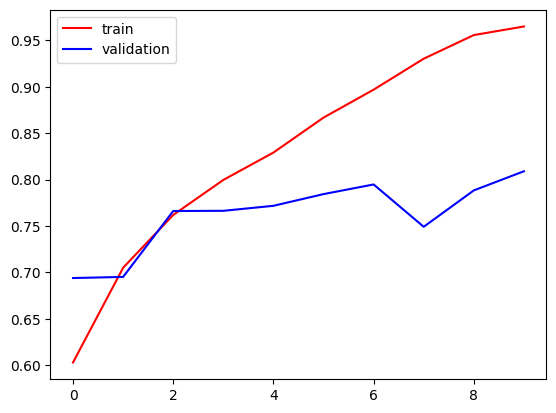

In [19]:
# After adding batchnorm and dropout layers to reduce overfitting, we can see the change in the spacing btw the 2 axis
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

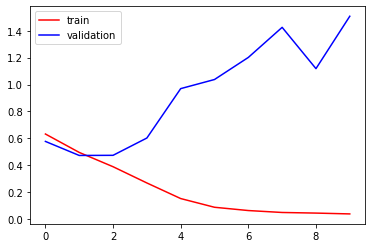

In [ ]:
# Plot a graph of loss vs validation loss(Before)
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

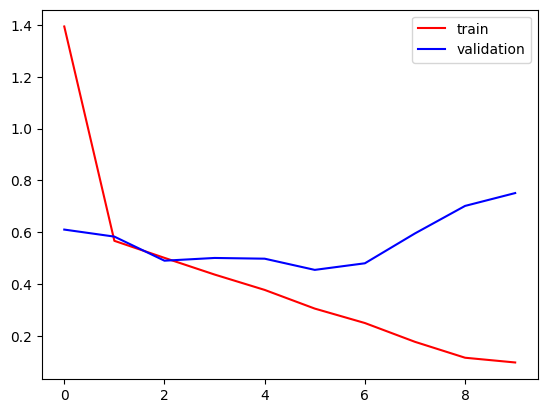

In [21]:
# After adding the layers
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

# **Import the images of dog's and cat's to check whether the value assigned to them is correct or not**

In [43]:
import cv2

**Dog**

In [71]:
# Import the dog's image
test_img = cv2.imread('/content/dog.31.jpg')

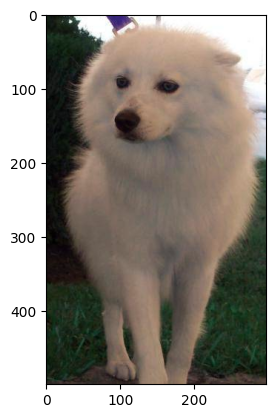

In [72]:
# To see the image
plt.imshow(test_img)

In [73]:
# To check the dimensions of the image
test_img.shape

(500, 297, 3)

In [74]:
# To make the image size- 256
test_img = cv2.resize(test_img,(256,256))

In [75]:
# To reshape the images with required dimensions(here 1 is the batch size and 256,3 is the dimensions)
test_input = test_img.reshape((1,256,256,3))

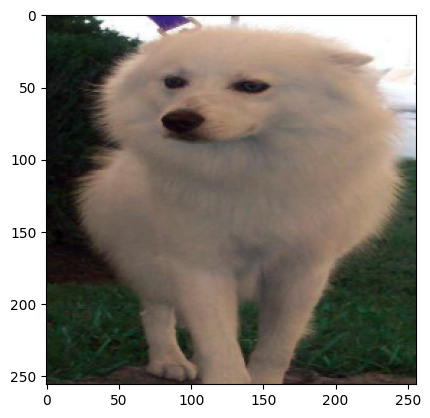

In [76]:
plt.imshow(test_img)

In [77]:
test_img.shape

(256, 256, 3)

In [78]:
# Finally model predicts the correct assigned values
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

**Cat**

In [63]:
test_img = cv2.imread('/content/cat.11.jpg')

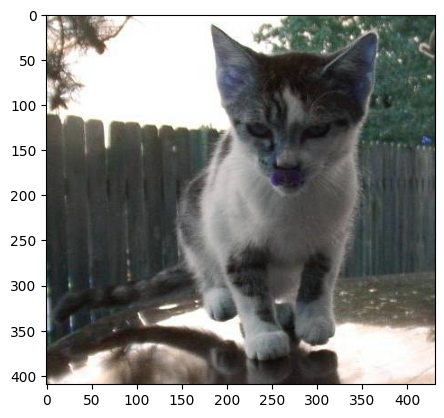

In [64]:
plt.imshow(test_img)

In [65]:
test_img.shape

(410, 431, 3)

In [66]:
test_img = cv2.resize(test_img, (256,256))

In [67]:
test_input = test_img.reshape((1,256,256,3))

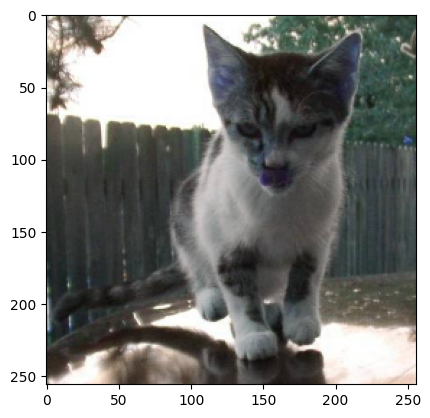

In [68]:
plt.imshow(test_img)

In [69]:
test_img.shape

(256, 256, 3)

In [70]:
model.predict(test_input)

1/1 [==============================] - 0s 26ms/step


array([[0.]], dtype=float32)